In [1]:
import numpy as np
import pandas as pd

from algorithm.util.directed_graph import DirectedGraph
from algorithm.util.read_pairs_data import read_data_db
from algorithm.util.graph_vis import GraphVisualization
from algorithm.edmonds import EdmondsAlgorithm
from algorithm.first_accept_n_way import FirstAcceptNWay
from algorithm.priority_based_n_way import PriorityBasedNWay

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
edmond_matches = []
first_accept_matches3 = []
first_accept_matches10 = []
priority_based3 = []
priority_based10 = []
priority_based3g = []
priority_based10g = []

for i in range(1, 31):
    date_data = "2021_01_" + str(i).zfill(2)
    pairs_data = read_data_db(date_data)
    grph = DirectedGraph(pairs_data)
    
    # Benchmark = Edmond's Algorithm
    edmond = EdmondsAlgorithm(priority_threshold=100)
    edmond.finalize_exchange(grph)
    edmond_matches.append(edmond.get_num_of_matched_pairs())
    
    # First Accept N Way with n = 3
    fanway3 = FirstAcceptNWay(3, 'maximum')
    fanway3.finalize_exchange(grph)
    first_accept_matches3.append(fanway3.get_num_of_matched_pairs())
    
    # First Accept N Way with n = 10
    fanway10 = FirstAcceptNWay(10, 'maximum')
    fanway10.finalize_exchange(grph)
    first_accept_matches10.append(fanway10.get_num_of_matched_pairs())
    
    # Priority Based N Way with n = 3 and infrequent priority
    pbnway3 = PriorityBasedNWay(3, 'maximum', 'infrequent')
    pbnway3.finalize_exchange(grph)
    priority_based3.append(pbnway3.get_num_of_matched_pairs())
    
    # Priority Based N Way with n = 10 and infrequent priority
    pbnway10 = PriorityBasedNWay(10, 'maximum', 'infrequent')
    pbnway10.finalize_exchange(grph)
    priority_based10.append(pbnway10.get_num_of_matched_pairs())
    
    # Priority Based N Way with n = 3 and greedy priority
    pbnway3g = PriorityBasedNWay(3, 'maximum', 'greedy')
    pbnway3g.finalize_exchange(grph)
    priority_based3g.append(pbnway3.get_num_of_matched_pairs())
    
    # Priority Based N Way with n = 10 and greedy priority
    pbnway10g = PriorityBasedNWay(10, 'maximum', 'greedy')
    pbnway10g.finalize_exchange(grph)
    priority_based10g.append(pbnway3.get_num_of_matched_pairs())

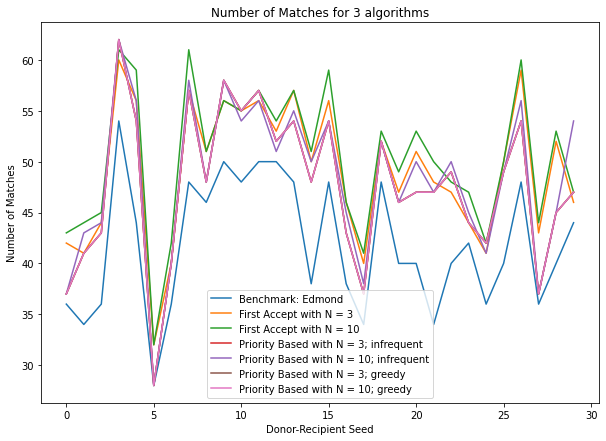

In [3]:
plt.figure(figsize=(10, 7))

plt.title("Number of Matches for 3 algorithms")
plt.xlabel("Donor-Recipient Seed")
plt.ylabel("Number of Matches")

plt.plot(edmond_matches, label='Benchmark: Edmond')
plt.plot(first_accept_matches3, label='First Accept with N = 3')
plt.plot(first_accept_matches10, label='First Accept with N = 10')
plt.plot(priority_based3, label='Priority Based with N = 3; infrequent')
plt.plot(priority_based10, label='Priority Based with N = 10; infrequent')
plt.plot(priority_based3g, label='Priority Based with N = 3; greedy')
plt.plot(priority_based10g, label='Priority Based with N = 10; greedy')

plt.legend()

In [4]:
# First Accept

different_n_1000_1099 = []
different_n_1500_1599 = []
different_n_2100_2199 = []
different_n_2900_2999 = []

pairs_data1 = read_data_db("2021_01_11")
grph1 = DirectedGraph(pairs_data1)

pairs_data2 = read_data_db("2021_01_16")
grph2 = DirectedGraph(pairs_data2)

pairs_data3 = read_data_db("2021_01_22")
grph3 = DirectedGraph(pairs_data3)

pairs_data4 = read_data_db("2021_01_30")
grph4 = DirectedGraph(pairs_data4)

for n in range(2, 15):
    fanway1 = FirstAcceptNWay(n, 'maximum')
    fanway1.finalize_exchange(grph1)
    different_n_1000_1099.append(fanway1.get_num_of_matched_pairs())
    
    fanway2 = FirstAcceptNWay(n, 'maximum')
    fanway2.finalize_exchange(grph2)
    different_n_1500_1599.append(fanway2.get_num_of_matched_pairs())
    
    fanway3 = FirstAcceptNWay(n, 'maximum')
    fanway3.finalize_exchange(grph3)
    different_n_2100_2199.append(fanway3.get_num_of_matched_pairs())  
    
    fanway4 = FirstAcceptNWay(n, 'maximum')
    fanway4.finalize_exchange(grph4)
    different_n_2900_2999.append(fanway4.get_num_of_matched_pairs())

In [5]:
print(different_n_1000_1099)
print(different_n_1500_1599)
print(different_n_2100_2199)
print(different_n_2900_2999)

[48, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
[48, 56, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59]
[36, 48, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
[44, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47]


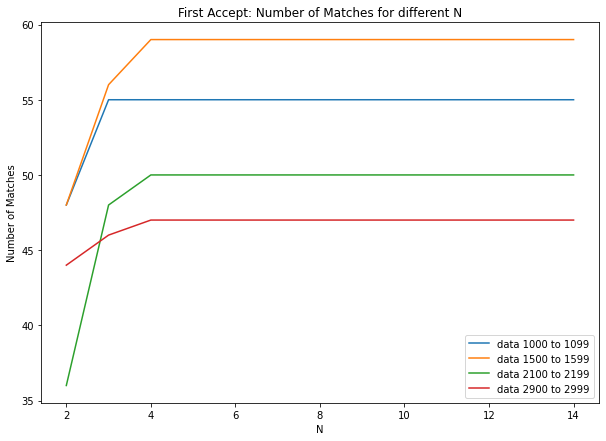

In [6]:
plt.figure(figsize=(10, 7))

plt.title("First Accept: Number of Matches for different N")
plt.xlabel("N")
plt.ylabel("Number of Matches")

sns.lineplot(y=different_n_1000_1099, x=range(2,15))
sns.lineplot(y=different_n_1500_1599, x=range(2,15))
sns.lineplot(y=different_n_2100_2199, x=range(2,15))
sns.lineplot(y=different_n_2900_2999, x=range(2,15))

plt.legend([
    "data 1000 to 1099",
    "data 1500 to 1599",
    "data 2100 to 2199",
    "data 2900 to 2999"
])

In [7]:
# Priority Based - Infrequent

pb_different_n_1000_1099 = []
pb_different_n_1500_1599 = []
pb_different_n_2100_2199 = []
pb_different_n_2900_2999 = []

pairs_data1 = read_data_db("2021_01_11")
grph1 = DirectedGraph(pairs_data1)

pairs_data2 = read_data_db("2021_01_16")
grph2 = DirectedGraph(pairs_data2)

pairs_data3 = read_data_db("2021_01_21")
grph3 = DirectedGraph(pairs_data3)

pairs_data4 = read_data_db("2021_01_30")
grph4 = DirectedGraph(pairs_data4)

for n in range(2, 15):
    pbnway1 = PriorityBasedNWay(n, 'maximum', 'infrequent')
    pbnway1.finalize_exchange(grph1)
    pb_different_n_1000_1099.append(pbnway1.get_num_of_matched_pairs())
    
    pbnway2 = PriorityBasedNWay(n, 'maximum', 'infrequent')
    pbnway2.finalize_exchange(grph2)
    pb_different_n_1500_1599.append(pbnway2.get_num_of_matched_pairs())
    
    pbnway3 = PriorityBasedNWay(n, 'maximum', 'infrequent')
    pbnway3.finalize_exchange(grph3)
    pb_different_n_2100_2199.append(pbnway3.get_num_of_matched_pairs())  
    
    pbnway4 = PriorityBasedNWay(n, 'maximum', 'infrequent')
    pbnway4.finalize_exchange(grph4)
    pb_different_n_2900_2999.append(pbnway4.get_num_of_matched_pairs())

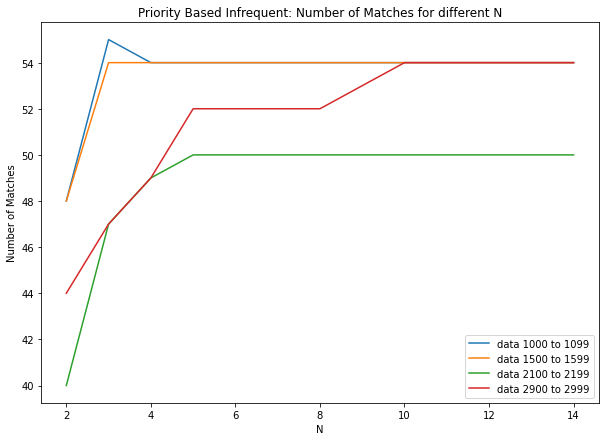

In [8]:
plt.figure(figsize=(10, 7))

plt.title("Priority Based Infrequent: Number of Matches for different N")
plt.xlabel("N")
plt.ylabel("Number of Matches")

sns.lineplot(y=pb_different_n_1000_1099, x=range(2,15))
sns.lineplot(y=pb_different_n_1500_1599, x=range(2,15))
sns.lineplot(y=pb_different_n_2100_2199, x=range(2,15))
sns.lineplot(y=pb_different_n_2900_2999, x=range(2,15))

plt.legend([
    "data 1000 to 1099",
    "data 1500 to 1599",
    "data 2100 to 2199",
    "data 2900 to 2999"
])

In [9]:
# Priority Based - Greedy

pb_different_n_1000_1099 = []
pb_different_n_1500_1599 = []
pb_different_n_2100_2199 = []
pb_different_n_2900_2999 = []

pairs_data1 = read_data_db("2021_01_11")
grph1 = DirectedGraph(pairs_data1)

pairs_data2 = read_data_db("2021_01_16")
grph2 = DirectedGraph(pairs_data2)

pairs_data3 = read_data_db("2021_01_21")
grph3 = DirectedGraph(pairs_data3)

pairs_data4 = read_data_db("2021_01_30")
grph4 = DirectedGraph(pairs_data4)

for n in range(2, 15):
    pbnway1 = PriorityBasedNWay(n, 'maximum', 'greedy')
    pbnway1.finalize_exchange(grph1)
    pb_different_n_1000_1099.append(pbnway1.get_num_of_matched_pairs())
    
    pbnway2 = PriorityBasedNWay(n, 'maximum', 'greedy')
    pbnway2.finalize_exchange(grph2)
    pb_different_n_1500_1599.append(pbnway2.get_num_of_matched_pairs())
    
    pbnway3 = PriorityBasedNWay(n, 'maximum', 'greedy')
    pbnway3.finalize_exchange(grph3)
    pb_different_n_2100_2199.append(pbnway3.get_num_of_matched_pairs())  
    
    pbnway4 = PriorityBasedNWay(n, 'maximum', 'greedy')
    pbnway4.finalize_exchange(grph4)
    pb_different_n_2900_2999.append(pbnway4.get_num_of_matched_pairs())

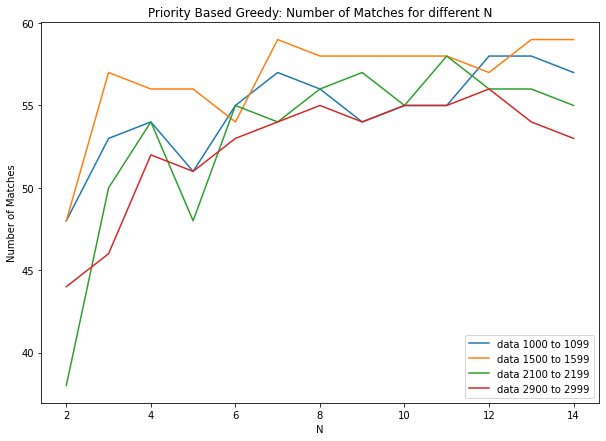

In [10]:
plt.figure(figsize=(10, 7))

plt.title("Priority Based Greedy: Number of Matches for different N")
plt.xlabel("N")
plt.ylabel("Number of Matches")

sns.lineplot(y=pb_different_n_1000_1099, x=range(2,15))
sns.lineplot(y=pb_different_n_1500_1599, x=range(2,15))
sns.lineplot(y=pb_different_n_2100_2199, x=range(2,15))
sns.lineplot(y=pb_different_n_2900_2999, x=range(2,15))

plt.legend([
    "data 1000 to 1099",
    "data 1500 to 1599",
    "data 2100 to 2199",
    "data 2900 to 2999"
])

In [11]:
# Priority Based - Infrequent vs Greedy

pb = {}

for d in ["2021_01_05", "2021_01_15", "2021_01_20", "2021_01_25"]:
    data = read_data_db(d)
    grph = DirectedGraph(data)
    pb[d] = {}
    for n in range(2, 15):
        pb[d][n] = {}
        for g in ['greedy', 'infrequent']:
            prio = PriorityBasedNWay(n, 'maximum', g)
            prio.finalize_exchange(grph)
            
            pb[d][n][g] = prio.get_num_of_matched_pairs()

In [12]:
pb

{'2021_01_05': {2: {'greedy': 46, 'infrequent': 44},
  3: {'greedy': 54, 'infrequent': 54},
  4: {'greedy': 60, 'infrequent': 56},
  5: {'greedy': 58, 'infrequent': 56},
  6: {'greedy': 56, 'infrequent': 56},
  7: {'greedy': 61, 'infrequent': 56},
  8: {'greedy': 60, 'infrequent': 56},
  9: {'greedy': 59, 'infrequent': 56},
  10: {'greedy': 60, 'infrequent': 56},
  11: {'greedy': 62, 'infrequent': 56},
  12: {'greedy': 59, 'infrequent': 56},
  13: {'greedy': 61, 'infrequent': 56},
  14: {'greedy': 60, 'infrequent': 56}},
 '2021_01_15': {2: {'greedy': 38, 'infrequent': 38},
  3: {'greedy': 51, 'infrequent': 48},
  4: {'greedy': 48, 'infrequent': 50},
  5: {'greedy': 52, 'infrequent': 50},
  6: {'greedy': 50, 'infrequent': 50},
  7: {'greedy': 52, 'infrequent': 50},
  8: {'greedy': 54, 'infrequent': 50},
  9: {'greedy': 52, 'infrequent': 50},
  10: {'greedy': 53, 'infrequent': 50},
  11: {'greedy': 53, 'infrequent': 50},
  12: {'greedy': 53, 'infrequent': 50},
  13: {'greedy': 53, 'infre

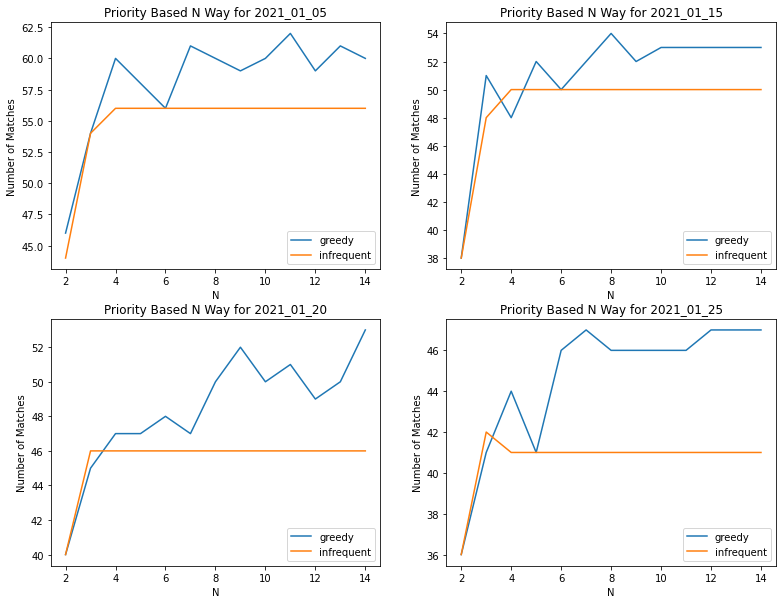

In [13]:
plt.figure(figsize=(13, 10))

for idx, date in enumerate(pb):
    plt.subplot(2, 2, idx+1)
    n = list(pb[date].keys())
    gr = [a['greedy'] for a in pb[date].values()]
    iq = [a['infrequent'] for a in pb[date].values()]
    plt.title("Priority Based N Way for " + date)
    plt.xlabel("N")
    plt.ylabel("Number of Matches")
    
    sns.lineplot(y=gr, x=n)
    sns.lineplot(y=iq, x=n)
    
    plt.legend(['greedy', 'infrequent'], loc=4)